## AI BOT FOR MEDICINE-Pneumonia

## Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Ignore all warnings
import warnings
warnings.filterwarnings('ignore')

## Setting Parameters

In [2]:
image_size = (224, 224)
batch_size = 32
epochs = 10

## Data Preparation For Training, Validation and Testing

In [3]:
train_datagen = ImageDataGenerator(rescale=1.0/255.0, 
                                    rotation_range=20, 
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                    shear_range=0.2,
                                    zoom_range=0.2,
                                    horizontal_flip=True,
                                    fill_mode='nearest')

val_datagen = ImageDataGenerator(rescale=1.0/255.0)

test_datagen = ImageDataGenerator(rescale=1.0/255.0)

## Directories For the Datasets

In [4]:
train_dir = r"C:\Users\thangaperumale\Downloads\Pneumonia\archive\chest_xray\train"
val_dir = r"C:\Users\thangaperumale\Downloads\Pneumonia\archive\chest_xray\val"
test_dir = r"C:\Users\thangaperumale\Downloads\Pneumonia\archive\chest_xray\test"

## Train, Validation and Test Generators

In [5]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=batch_size,
    color_mode='rgb',
    class_mode='binary')

validation_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=image_size,
    batch_size=batch_size,
    color_mode='rgb',
    class_mode='binary')

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=image_size,
    batch_size=batch_size,
    color_mode='rgb',
    class_mode='binary')

Found 4241 images belonging to 2 classes.
Found 415 images belonging to 2 classes.
Found 1200 images belonging to 2 classes.


## Building the CNN Model

In [6]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(image_size[0], image_size[1], 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))  # Binary classification

## Compile and Train the Model

In [7]:
# Compile the Model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the Model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    epochs=epochs
)

Epoch 1/10
132/132 ━━━━━━━━━━━━━━━━━━━━ 219s 2s/step - accuracy: 0.7572 - loss: 0.5172 - val_accuracy: 0.8542 - val_loss: 0.3433
Epoch 2/10
132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9062 - loss: 0.2756 - val_accuracy: 0.8387 - val_loss: 0.2955
Epoch 3/10
132/132 ━━━━━━━━━━━━━━━━━━━━ 229s 2s/step - accuracy: 0.8548 - loss: 0.3126 - val_accuracy: 0.9141 - val_loss: 0.2536
Epoch 4/10
132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9062 - loss: 0.1899 - val_accuracy: 0.8065 - val_loss: 0.3457
Epoch 5/10
132/132 ━━━━━━━━━━━━━━━━━━━━ 208s 2s/step - accuracy: 0.8761 - loss: 0.2774 - val_accuracy: 0.8672 - val_loss: 0.2780
Epoch 6/10
132/132 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7188 - loss: 0.4733 - val_accuracy: 0.9032 - val_loss: 0.2060
Epoch 7/10
132/132 ━━━━━━━━━━━━━━━━━━━━ 204s 2s/step - accuracy: 0.8819 - loss: 0.2757 - val_accuracy: 0.7917 - val_loss: 0.3744
Epoch 8/10
132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9062 - loss: 0.2366 - val_accuracy

## Evaluation of the Model on the Test Set

In [8]:
test_loss, test_acc = model.evaluate(test_generator)
print(f'Test accuracy: {test_acc:.2f}')

38/38 ━━━━━━━━━━━━━━━━━━━━ 19s 491ms/step - accuracy: 0.8555 - loss: 0.3649
Test accuracy: 0.87


## Plotting the Training History

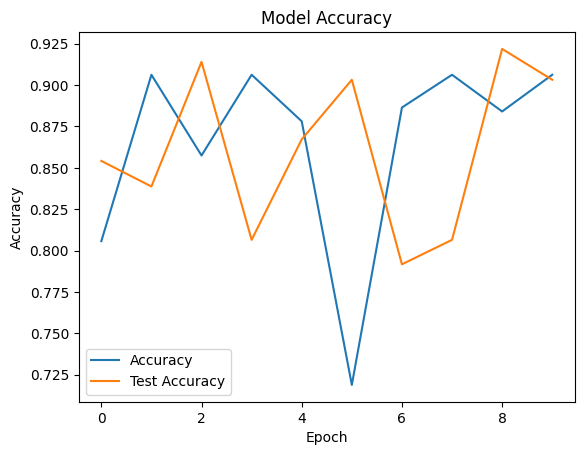

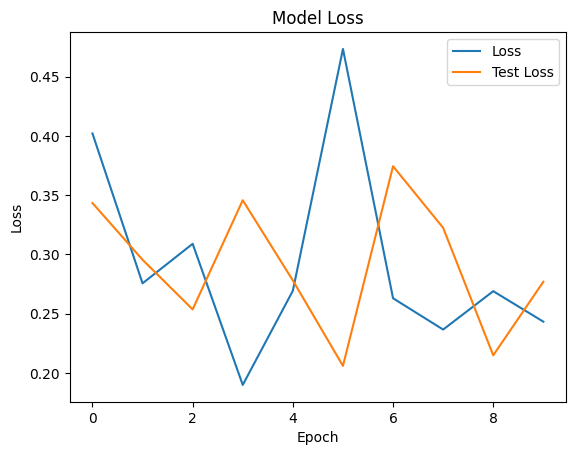

In [9]:
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Save the trained model

In [10]:
model.save('pneumonia_detection_model.h5')

## Load New Image To Check Whether it is Pneumonia or Not

In [12]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
# Function to load and preprocess a new image for prediction
def load_and_preprocess_image(image_path):
    # Load the image with the target size
    img = image.load_img(image_path, target_size=image_size)
    
    # Convert the image to an array and rescale
    img_array = image.img_to_array(img) / 255.0
    
    # Expand dimensions to create a batch of size 1
    img_array = np.expand_dims(img_array, axis=0)
    return img_array

# Function to predict whether an image shows signs of edema
def predict_pneumonia(image_path):
    # Load the trained model
    model = load_model('pneumonia_detection_model.h5')
    
    # Preprocess the input image
    img_array = load_and_preprocess_image(image_path)
    
    # Make prediction
    prediction = model.predict(img_array)[0][0]  # Single output for binary classification

    # Interpret the prediction
    if prediction > 0.5:
        print("Prediction: Pneumonia detected.")
    else:
        print("Prediction: No Pneumonia detected.")
    print(f"Prediction Accuracy: {prediction:.4f}")

# Example usage: predict on a new image
print(predict_pneumonia(r"C:\Users\thangaperumale\Downloads\Pneumonia\archive\chest_xray\test\PNEUMONIA\person735_bacteria_2638.jpeg"))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step
Prediction: Pneumonia detected.
Prediction Accuracy: 0.9837
None
